# Code from Vered

In [1]:
!ls

erai_jan1979.png	   WACCM3DO3_DATA_1955.nc
fix_for_vered-Copy1.ipynb  WACCM3DO3_LWAREF_1955_clare.nc
fix_for_vered.ipynb	   WACCM_LWA_1955_orig.py
waccm_19550101.png	   WACCM_refstate_1955.py


In [2]:
import numpy as np
from numpy import dtype
from math import pi
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import datetime as dt
#matplotlib inline
from hn2016_falwa.oopinterface import QGField
import hn2016_falwa.utilities as utilities
import datetime as dt

In [3]:
!ls

erai_jan1979.png	   WACCM3DO3_DATA_1955.nc
fix_for_vered-Copy1.ipynb  WACCM3DO3_LWAREF_1955_clare.nc
fix_for_vered.ipynb	   WACCM_LWA_1955_orig.py
waccm_19550101.png	   WACCM_refstate_1955.py


In [4]:
file_handle = Dataset('WACCM3DO3_DATA_1955.nc', mode='r')
file_handle

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): levels(28), latitude(96), longitude(144), time(1)
    variables(dimensions): float32 levels(levels), float32 latitude(latitude), float32 longitude(longitude), int64 time(time), float32 U(time,levels,latitude,longitude), float32 V(time,levels,latitude,longitude), float32 T(time,levels,latitude,longitude)
    groups: 

In [5]:
file_handle.variables['time'][:]

masked_array(data=[0],
             mask=False,
       fill_value=999999)

In [6]:
file_handle.variables['latitude'][:]

masked_array(data=[-90.        , -88.10526   , -86.210526  , -84.31579   ,
                   -82.42105   , -80.52631   , -78.63158   , -76.73684   ,
                   -74.8421    , -72.947365  , -71.052635  , -69.1579    ,
                   -67.26316   , -65.36842   , -63.473682  , -61.57895   ,
                   -59.68421   , -57.789474  , -55.894737  , -54.        ,
                   -52.105263  , -50.210526  , -48.31579   , -46.42105   ,
                   -44.526318  , -42.63158   , -40.736843  , -38.842106  ,
                   -36.94737   , -35.05263   , -33.157894  , -31.263159  ,
                   -29.368422  , -27.473684  , -25.578947  , -23.68421   ,
                   -21.789474  , -19.894737  , -18.        , -16.105263  ,
                   -14.210526  , -12.315789  , -10.421053  ,  -8.526316  ,
                    -6.631579  ,  -4.736842  ,  -2.8421052 ,  -0.94736844,
                     0.94736844,   2.8421052 ,   4.736842  ,   6.631579  ,
                     8.52

In [7]:
file_handle.variables['longitude'][:]

masked_array(data=[  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,
                    20. ,  22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,
                    40. ,  42.5,  45. ,  47.5,  50. ,  52.5,  55. ,  57.5,
                    60. ,  62.5,  65. ,  67.5,  70. ,  72.5,  75. ,  77.5,
                    80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
                   100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5,
                   120. , 122.5, 125. , 127.5, 130. , 132.5, 135. , 137.5,
                   140. , 142.5, 145. , 147.5, 150. , 152.5, 155. , 157.5,
                   160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
                   180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
                   200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5,
                   220. , 222.5, 225. , 227.5, 230. , 232.5, 235. , 237.5,
                   240. , 242.5, 245. , 247.5, 250. , 252.5, 255. , 257.5,
                   260. ,

In [8]:
file_handle.variables['levels'][:].data
plev = file_handle.variables['levels'][:].data

In [9]:
file_handle.variables['time'][:]

masked_array(data=[0],
             mask=False,
       fill_value=999999)

In [10]:
u_file = Dataset('WACCM3DO3_DATA_1955.nc', mode='r')
v_file = Dataset('WACCM3DO3_DATA_1955.nc', mode='r')
t_file = Dataset('WACCM3DO3_DATA_1955.nc', mode='r')

In [11]:
xlon = u_file.variables['longitude'][:].data
ylat_even = u_file.variables['latitude'][:].data
plev = u_file.variables['levels'][:].data

nlon = xlon.size
nlat_even = ylat_even.size
nlev = plev.size

In [12]:
ylat = np.linspace(-90, 90, nlat_even+1, endpoint=True)
nlat = ylat.size

In [13]:
clat = np.cos(np.deg2rad(ylat))     # cosine latitude
p0 = 1000.                          # surface pressure [hPa]
dz = 1000.                          # differential height element
kmax = 66                           # number of grid points for vertical extrapolation (dimension of height)
height = np.arange(0,kmax*dz,dz)    # pseudoheight [m]
dphi = np.diff(ylat)[0]*pi/180.     # differential latitudinal element
dlambda = np.diff(xlon)[0]*pi/180.  # differential latitudinal element
hh = 7000.                          # scale height
cp = 1004.                          # heat capacity of dry air
rr = 287.                           # gas constant
omega = 7.29e-5                     # rotation rate of the earth
aa = 6.378e+6                       # earth radius
prefactor = 6500.                   # integrated sum of density from ground to aloft
npart = nlat                        # number of partitions to construct the equivalent latitude grids
maxits = 100000                     # maximum number of iteration in the SOR solver to solve for reference state
tol = 1.e-5                         # tolerance that define convergence of solution
rjac = 0.95                         # spectral radius of the Jacobi iteration in the SOR solver.
jd = nlat//2+1                      # (one plus) index of latitude grid point with value 0 deg


In [14]:
original_height = -hh*np.log(plev/p0)
original_height

array([   -0.    ,   545.7307,  1137.6323,  1784.246 ,  2496.7249,
        3575.779 ,  4852.0303,  6414.0347,  8427.81  ,  9704.061 ,
       11266.065 , 13279.84  , 16118.096 , 18614.82  , 20970.127 ,
       24545.906 , 27384.162 , 32236.191 , 34732.914 , 37088.223 ,
       40664.    , 43502.258 , 48354.29  , 50851.01  , 53206.316 ,
       56782.094 , 59620.35  , 64472.383 ], dtype=float32)

In [15]:
p_height = p0*np.exp(-height/hh)

In [16]:
p_height

array([1.00000000e+03, 8.66877900e+02, 7.51477293e+02, 6.51439058e+02,
       5.64718122e+02, 4.89541660e+02, 4.24372846e+02, 3.67879441e+02,
       3.18906557e+02, 2.76453047e+02, 2.39651036e+02, 2.07748187e+02,
       1.80092312e+02, 1.56118045e+02, 1.35335283e+02, 1.17319166e+02,
       1.01701392e+02, 8.81626894e+01, 7.64262870e+01, 6.62522592e+01,
       5.74326193e+01, 4.97870684e+01, 4.31593093e+01, 3.74138514e+01,
       3.24332409e+01, 2.81156597e+01, 2.43728441e+01, 2.11282799e+01,
       1.83156389e+01, 1.58774226e+01, 1.37637867e+01, 1.19315225e+01,
       1.03431732e+01, 8.96626826e+00, 7.77265980e+00, 6.73794700e+00,
       5.84097734e+00, 5.06341417e+00, 4.38936184e+00, 3.80504078e+00,
       3.29850576e+00, 2.85940174e+00, 2.47875218e+00, 2.14877548e+00,
       1.86272598e+00, 1.61475598e+00, 1.39979627e+00, 1.21345245e+00,
       1.05191511e+00, 9.11881966e-01, 7.90490323e-01, 6.85258591e-01,
       5.94035528e-01, 5.14956271e-01, 4.46404211e-01, 3.86977945e-01,
      

In [17]:
uu_even = u_file.variables['U'][0, :, :, :].data
vv_even = v_file.variables['V'][0, :, :, :].data
tt_even = t_file.variables['T'][0, :, :, :].data

Text(0.5, 1.0, "Vered's zonal mean wind")

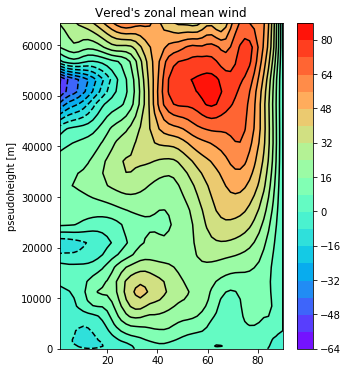

In [18]:
plt.figure(figsize=(5,6))
plt.contourf(ylat_even[48:], -hh*np.log(plev/1000.), uu_even[:, 48:, :].mean(axis=-1), 21, cmap='rainbow')
plt.colorbar()
plt.contour(ylat_even[48:], -hh*np.log(plev/1000.), uu_even[:, 48:, :].mean(axis=-1), 21, colors='k')
plt.ylabel('pseudoheight [m]')
plt.title('Vered\'s zonal mean wind')

In [19]:
from scipy.interpolate import interp1d

f_u = interp1d(ylat_even, uu_even, kind='linear', axis=1)
f_v = interp1d(ylat_even, vv_even, kind='linear', axis=1)
f_t = interp1d(ylat_even, tt_even, kind='linear', axis=1)

In [20]:
uu = f_u(ylat)
vv = f_v(ylat)
tt = f_t(ylat)

In [21]:
uu_even.shape

(28, 96, 144)

In [22]:
uu.shape

(28, 97, 144)

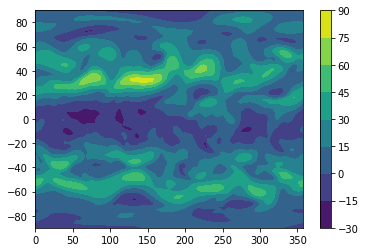

In [23]:
plt.contourf(xlon, ylat_even, uu_even[9, :, :])
plt.colorbar()

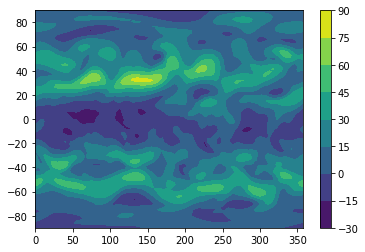

In [24]:
plt.contourf(xlon, ylat, uu[9, :, :])
plt.colorbar()

In [25]:
qgfield_object1 = QGField(xlon, ylat, plev, uu, vv, tt, kmax=kmax)

qgpv, interpolated_u, interpolated_v, interpolated_theta, static_stability = qgfield_object1.interpolate_fields()

qref, uref, ptref = \
    qgfield_object1.compute_reference_states(northern_hemisphere_results_only=True)

f1, f2, f3, f4, div_tmp, mhf_tmp, lwa_baro_tmp, utmp, lwa_tmp = qgfield_object1.compute_lwa_and_barotropic_fluxes()


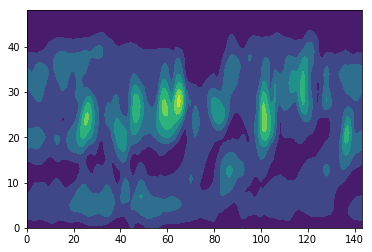

In [26]:
plt.contourf(lwa_baro_tmp)

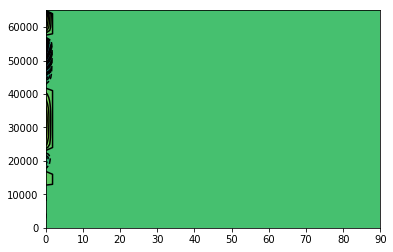

In [27]:
plt.contourf(ylat[48:], height, uref, 21)
plt.contour(ylat[48:], height, uref, 21, colors='k')

In [28]:
qgfield_object2 = QGField(xlon, ylat_even, plev, uu_even, vv_even, tt_even, kmax=kmax)

qgpv, interpolated_u, interpolated_v, interpolated_theta, static_stability = qgfield_object2.interpolate_fields()

qref, uref, ptref = \
    qgfield_object2.compute_reference_states(northern_hemisphere_results_only=True)

f1, f2, f3, f4, div_tmp, mhf_tmp, lwa_baro_tmp, utmp, lwa_tmp = qgfield_object2.compute_lwa_and_barotropic_fluxes()


In [29]:
interpolated_u[:, 48:, :].mean(axis=-1).shape

(66, 48)

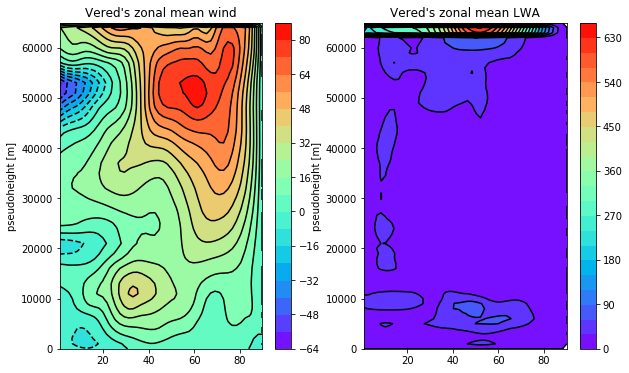

In [30]:
plt.subplots(figsize=(10,6))

plt.subplot(121)
plt.contourf(ylat_even[48:], height, interpolated_u[:, 48:, :].mean(axis=-1), 21, cmap='rainbow')
plt.colorbar()
plt.contour(ylat_even[48:], height, interpolated_u[:, 48:, :].mean(axis=-1), 21, colors='k')
plt.ylabel('pseudoheight [m]')
plt.title('Vered\'s zonal mean wind')

plt.subplot(122)
plt.contourf(ylat_even[48:], height, lwa_tmp[:, :, :].mean(axis=-1), 21, cmap='rainbow')
plt.colorbar()
plt.contour(ylat_even[48:], height, lwa_tmp[:, :, :].mean(axis=-1), 21, colors='k')
plt.ylabel('pseudoheight [m]')
plt.title('Vered\'s zonal mean LWA')

plt.show()


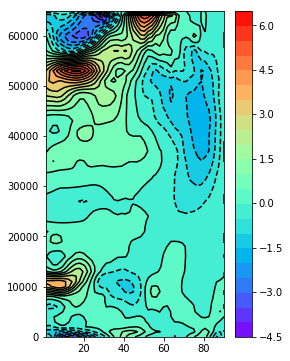

In [31]:
plt.figure(figsize=(4,6))
plt.contourf(ylat_even[48:], height, interpolated_v[:, 48:, :].mean(axis=-1), 21, cmap='rainbow')
plt.colorbar()
plt.contour(ylat_even[48:], height, interpolated_v[:, 48:, :].mean(axis=-1), 21, colors='k')
plt.show()


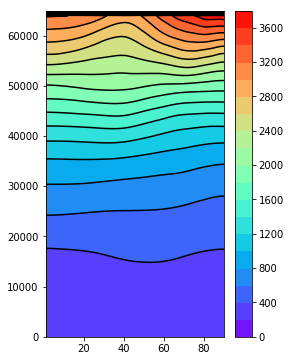

In [32]:
plt.figure(figsize=(4,6))
plt.contourf(ylat_even[48:], height, interpolated_theta[:, 48:, :].mean(axis=-1), 21, cmap='rainbow')
plt.colorbar()
plt.contour(ylat_even[48:], height, interpolated_theta[:, 48:, :].mean(axis=-1), 21, colors='k')
plt.show()


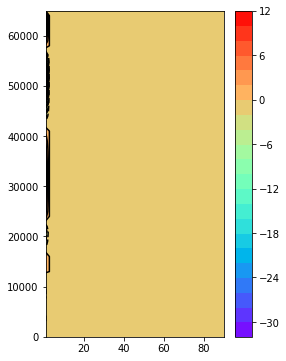

In [33]:
plt.figure(figsize=(4,6))
plt.contourf(ylat_even[48:], height, uref, 21, cmap='rainbow')
plt.colorbar()
plt.contour(ylat_even[48:], height, uref, 21, colors='k')
plt.show()


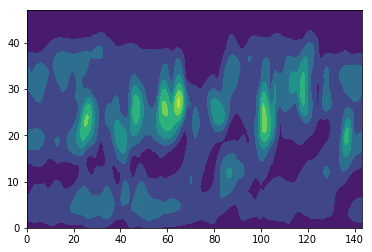

In [34]:
plt.contourf(lwa_baro_tmp)

In [35]:
uref.shape

(66, 48)